#Timebased model



In [160]:
# importing libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import dash
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
import functions
# stops python from showing scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

# importing cleaned and filtered dataframes

#c_df = pd.read_csv('/Users/stephen/Flatiron/Phase2/Project2/Data/my_dataframe', index_col=0)
#f_df = pd.read_csv('/Users/stephen/Flatiron/Phase2/Project2/Data/my_filtered_dataframe', index_col=0)

og_df = pd.read_csv('/Users/stephen/Flatiron/Phase2/Project2/Data/kc_house_data.csv')

In [161]:
og_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,NaN,NONE,...,7 Average,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,NO,NONE,...,7 Average,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,NO,NONE,...,6 Low Average,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,NO,NONE,...,7 Average,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,NO,NONE,...,8 Good,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


In [162]:
adf  = og_df.loc[og_df['price'] < og_df['price'].quantile(0.99)]
fdf  = adf.loc[adf['price'] > adf['price'].quantile(0.01)]
fdf['condition'].replace({ 'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5}, inplace=True)
fdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21166 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21166 non-null  int64  
 1   date           21166 non-null  object 
 2   price          21166 non-null  float64
 3   bedrooms       21166 non-null  int64  
 4   bathrooms      21166 non-null  float64
 5   sqft_living    21166 non-null  int64  
 6   sqft_lot       21166 non-null  int64  
 7   floors         21166 non-null  float64
 8   waterfront     18836 non-null  object 
 9   view           21105 non-null  object 
 10  condition      21166 non-null  int64  
 11  grade          21166 non-null  object 
 12  sqft_above     21166 non-null  int64  
 13  sqft_basement  21166 non-null  object 
 14  yr_built       21166 non-null  int64  
 15  yr_renovated   17409 non-null  float64
 16  zipcode        21166 non-null  int64  
 17  lat            21166 non-null  float64
 18  long  

/Users/stephen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:>

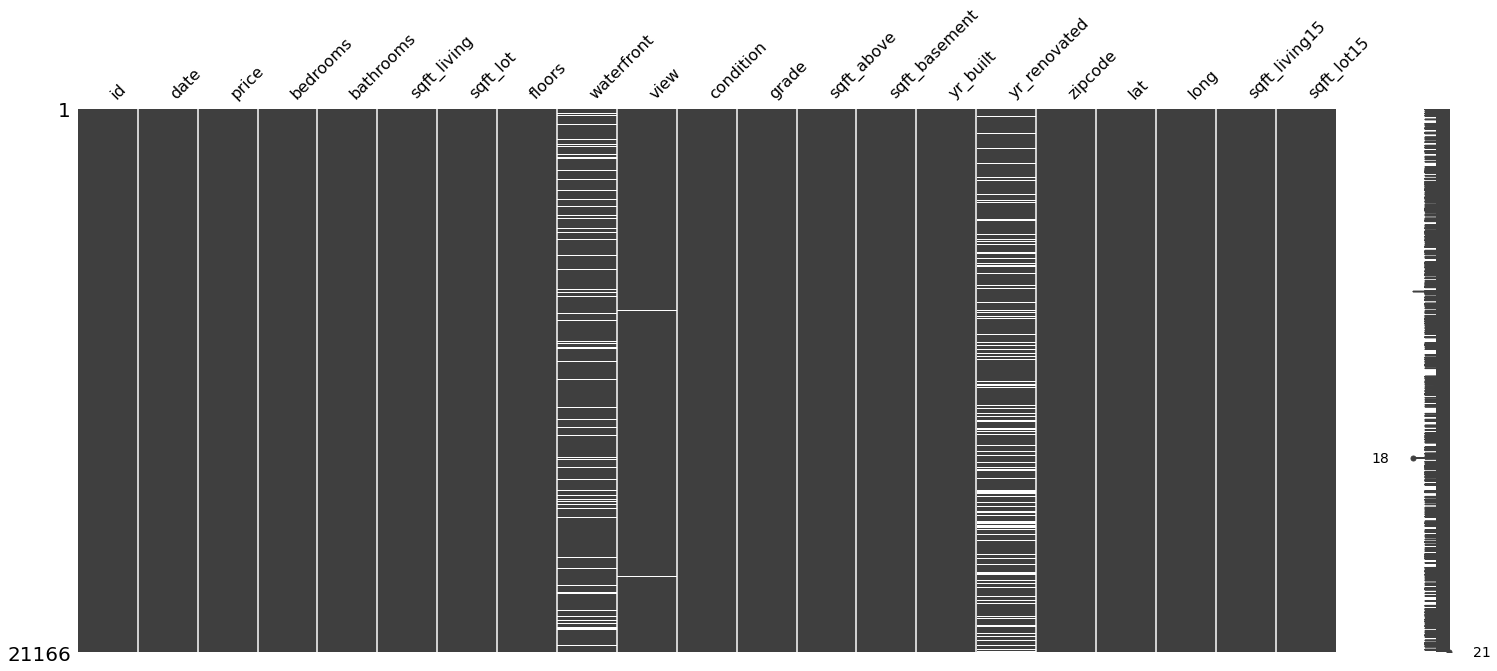

In [163]:
msno.matrix(fdf)

<AxesSubplot:>

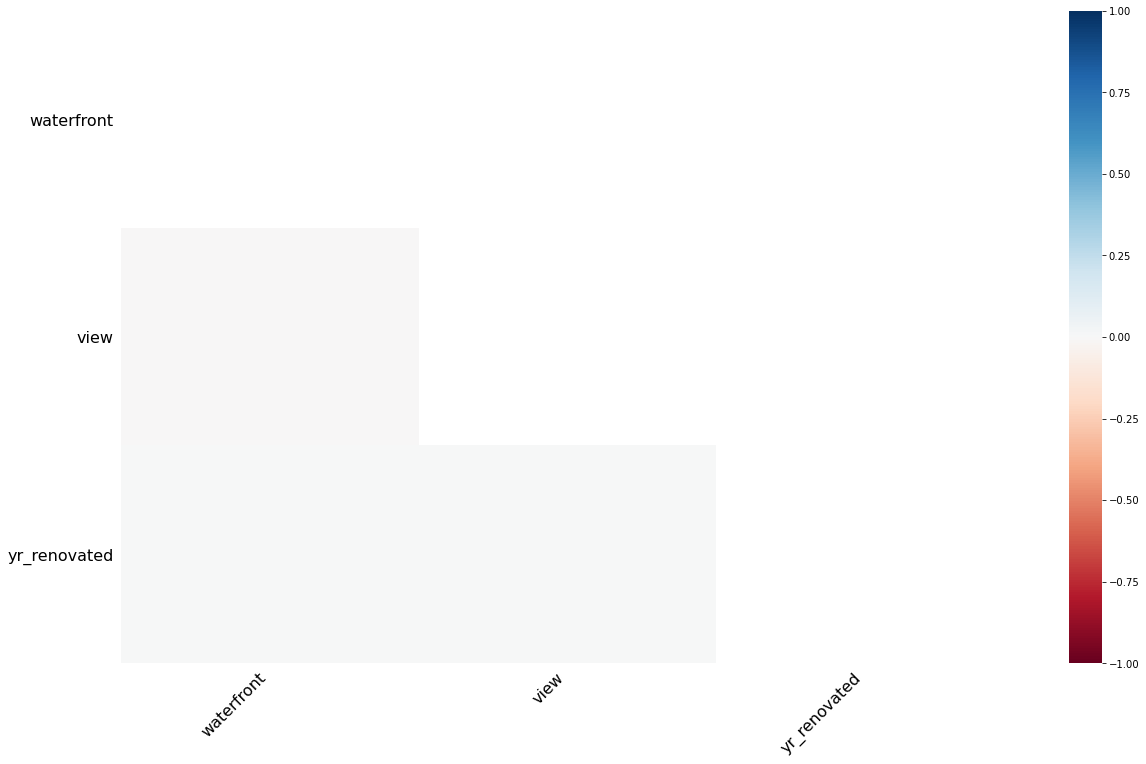

In [164]:
msno.heatmap(fdf)

<AxesSubplot:>

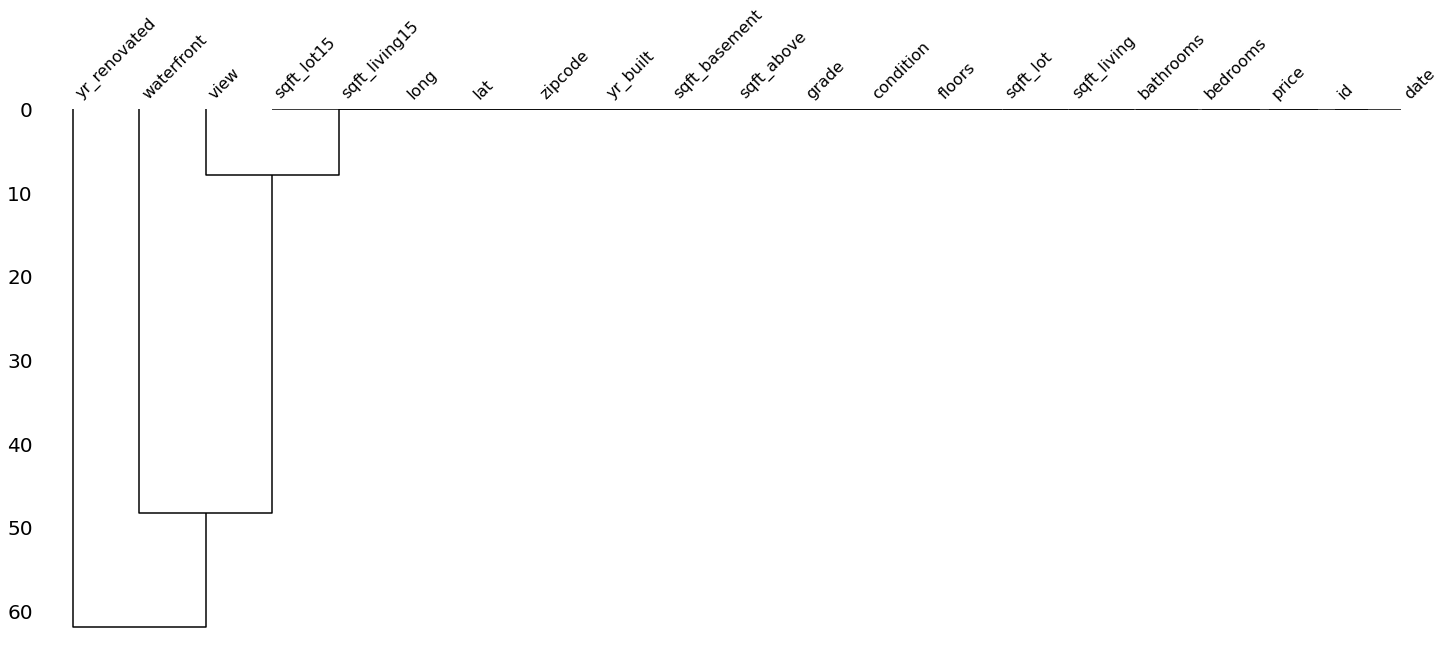

In [165]:
msno.dendrogram(fdf)

In [166]:
fdf.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [167]:
tdf =fdf[['price', 'date', 'yr_built', 'yr_renovated', 'id']]
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21166 entries, 0 to 21596
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         21166 non-null  float64
 1   date          21166 non-null  object 
 2   yr_built      21166 non-null  int64  
 3   yr_renovated  17409 non-null  float64
 4   id            21166 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 992.2+ KB


In [168]:
ldf = fdf[['price', 'view', 'zipcode', 'lat', 'long']]
ldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21166 entries, 0 to 21596
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    21166 non-null  float64
 1   view     21105 non-null  object 
 2   zipcode  21166 non-null  int64  
 3   lat      21166 non-null  float64
 4   long     21166 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 992.2+ KB


In [169]:
vdf = ldf.dropna()


In [170]:

#vdf['view'].dropna(inplace=True)

fig = px.scatter_mapbox(vdf,
                        lat='lat',
                        lon='long',
                        color='view',
                        zoom=8)
fig.update_layout(mapbox_style='open-street-map')

fig.show()

In [171]:


fdf['price'].describe()
#tdf = tdf[tdf['price'] > tdf[tdf['price']].quantile(0.05)
#tdf = tdf[tdf['price'] < tdf[tdf['price']].quantile(0.97)

count     21166.00
mean     522240.06
std      283481.95
min      153503.00
25%      325000.00
50%      450000.00
75%      638925.00
max     1960000.00
Name: price, dtype: float64

In [172]:
fdf['yr_renovated'].dropna()

0          0.00
1       1991.00
3          0.00
4          0.00
5          0.00
          ...  
21592      0.00
21593      0.00
21594      0.00
21595      0.00
21596      0.00
Name: yr_renovated, Length: 17409, dtype: float64

In [173]:
fdf.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21166.00,21166.00,21166.00,21166.00,21166.00,21166.00,21166.00,21166.00,21166.00,21166.00,17409.00,21166.00,21166.00,21166.00,21166.00,21166.00
mean,4591041773.05,522240.06,3.37,2.11,2061.87,15036.90,1.49,3.41,1774.68,1971.20,81.63,98077.94,47.56,-122.21,1978.58,12714.55
std,2878250244.59,283481.95,0.92,0.74,858.00,41145.08,0.54,0.65,790.50,29.32,395.33,53.30,0.14,0.14,666.93,27252.91
min,1000102.00,153503.00,1.00,0.50,370.00,520.00,1.00,1.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2125569915.50,325000.00,3.00,1.75,1430.00,5017.75,1.00,3.00,1200.00,1952.00,0.00,98033.00,47.47,-122.33,1490.00,5090.25
50%,3905030405.00,450000.00,3.00,2.25,1910.00,7578.50,1.50,3.00,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7600.00
75%,7331900285.00,638925.00,4.00,2.50,2530.00,10575.00,2.00,4.00,2190.00,1997.00,0.00,98117.00,47.68,-122.12,2350.00,10032.00
max,9900000190.00,1960000.00,33.00,7.50,7730.00,1651359.00,3.50,5.00,7420.00,2015.00,2015.00,98199.00,47.78,-121.31,5790.00,871200.00


In [174]:
df_matrix = fdf.corr()
df_matrix['yr_built']


id               0.02
price            0.05
bedrooms         0.15
bathrooms        0.52
sqft_living      0.33
sqft_lot         0.05
floors           0.49
condition       -0.37
sqft_above       0.44
yr_built         1.00
yr_renovated    -0.23
zipcode         -0.35
lat             -0.16
long             0.41
sqft_living15    0.33
sqft_lot15       0.07
Name: yr_built, dtype: float64

In [175]:
fdf['yr_renovated'].dropna()

0          0.00
1       1991.00
3          0.00
4          0.00
5          0.00
          ...  
21592      0.00
21593      0.00
21594      0.00
21595      0.00
21596      0.00
Name: yr_renovated, Length: 17409, dtype: float64

<AxesSubplot:>

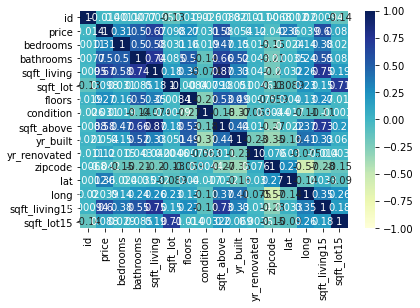

In [176]:
sns.heatmap(fdf.corr(), vmin=-1,vmax=1,center=0,annot=True,cmap="YlGnBu",)

In [177]:
fdf_matrix = fdf.corr()
fdf_matrix['price']

id              -0.01
price            1.00
bedrooms         0.31
bathrooms        0.50
sqft_living      0.67
sqft_lot         0.10
floors           0.27
condition        0.03
sqft_above       0.58
yr_built         0.05
yr_renovated     0.12
zipcode         -0.04
lat              0.36
long             0.04
sqft_living15    0.60
sqft_lot15       0.09
Name: price, dtype: float64

<AxesSubplot:>

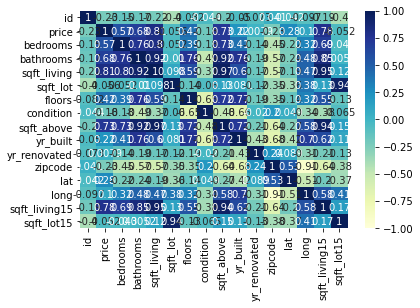

In [178]:
sns.heatmap(fdf_matrix.corr(), vmin=-1,vmax=1,center=0,annot=True,cmap="YlGnBu",)

In [179]:
fdf.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21166.00,21166.00,21166.00,21166.00,21166.00,21166.00,21166.00,21166.00,21166.00,21166.00,17409.00,21166.00,21166.00,21166.00,21166.00,21166.00
mean,4591041773.05,522240.06,3.37,2.11,2061.87,15036.90,1.49,3.41,1774.68,1971.20,81.63,98077.94,47.56,-122.21,1978.58,12714.55
std,2878250244.59,283481.95,0.92,0.74,858.00,41145.08,0.54,0.65,790.50,29.32,395.33,53.30,0.14,0.14,666.93,27252.91
min,1000102.00,153503.00,1.00,0.50,370.00,520.00,1.00,1.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2125569915.50,325000.00,3.00,1.75,1430.00,5017.75,1.00,3.00,1200.00,1952.00,0.00,98033.00,47.47,-122.33,1490.00,5090.25
50%,3905030405.00,450000.00,3.00,2.25,1910.00,7578.50,1.50,3.00,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7600.00
75%,7331900285.00,638925.00,4.00,2.50,2530.00,10575.00,2.00,4.00,2190.00,1997.00,0.00,98117.00,47.68,-122.12,2350.00,10032.00
max,9900000190.00,1960000.00,33.00,7.50,7730.00,1651359.00,3.50,5.00,7420.00,2015.00,2015.00,98199.00,47.78,-121.31,5790.00,871200.00


In [180]:
# Now if we normalize it by column:
#df_norm_row = fdf.apply(lambda x: (x-x.mean())/x.std(), axis = 1)
 
# And see the result
#sns.heatmap(fdf_norm_col, cmap='viridis')
#plt.show()

Linear Regression

In [181]:
fdf.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [182]:
df

NameError: name 'df' is not defined